# 정보시스템설계 및 실습 기말과제
##### 학번: 201320475
##### 이름: 이혁주
##### 학과: 산업공학과
## Problem 3.

In [1]:
import numpy as np
import pandas as pd

In [2]:
def data_gen(n):
    x=np.random.random(n)
    y=np.random.random(n)
    z=np.ones(n)
    z[(x<0.50) & (y<0.50)] = 1
    z[(x>=0.50) & (y<0.50)] = 2
    z[(x<0.50) & (y>=0.50)] = 3
    z[(x >= 0.50) & (x < 0.75) & (y >= 0.50) & (y < 0.75)] = 4
    z[(x >= 0.50) & (x < 0.75) & (y >= 0.75)] = 5
    z[(x >= 0.75) & (y >= 0.50) & (y < 0.75)] = 6
    z[(x >= 0.75) & (y >= 0.75)] = 7
    
    return x,y,z

In [3]:
def class_mean(x,y,z,k):
    u=np.ones(k*2)
    u=u.reshape(k,2)
    for i in range(k):
        for j in range(2):
            if j==0: u[i,j]=np.array(np.mean(x[z==i+1]))
            if j==1: u[i,j]=np.array(np.mean(y[z==i+1]))
        
    return u

In [4]:
def class_k_distance(x,y,uu,k,n):
    xx=x.copy()
    yy=y.copy()
    z=np.ones(n)

    xx1=(xx-uu[0,0])**2+(yy-uu[0,1])**2
    xx2=(xx-uu[1,0])**2+(yy-uu[1,1])**2
    xx3=(xx-uu[2,0])**2+(yy-uu[2,1])**2
    xx4=(xx-uu[3,0])**2+(yy-uu[3,1])**2
    xx5=(xx-uu[4,0])**2+(yy-uu[4,1])**2
    xx6=(xx-uu[5,0])**2+(yy-uu[5,1])**2
    xx7=(xx-uu[6,0])**2+(yy-uu[6,1])**2
    yy=np.array([xx1,xx2,xx3,xx4,xx5,xx6,xx7])
    
    ww=z.copy()
    for i in range(n):
        dmin=np.argmin(yy[:,i])
        ww[i]=dmin+1
             
    return ww

In [5]:
def k_means_algorithm(k,n,x,y,z):
    u=class_mean(x,y,z,k)

    while(1):
        ww=class_k_distance(x,y,u,k,n)
        uu=class_mean(x,y,ww,k)
        if np.sum(u==uu) == k*2:
            break
        u=uu.copy()
        
    
    u=uu.copy()
    ww=class_k_distance(x,y,u,k,n)
    print(uu)
    return uu, ww

In [6]:
def accuracy(z,ww):
    acc1=np.sum(z==ww)/len(z)
    print(acc1)
    return acc1

# main program
import numpy as np
n=1000
k=7
np.random.seed(42)
x,y,z=data_gen(n)

uu,ww=k_means_algorithm(k,n,x,y,z)
acc=accuracy(z,ww)

[[0.1802361  0.20740383]
 [0.67542571 0.1472247 ]
 [0.14039578 0.74735512]
 [0.44501162 0.52424494]
 [0.47706272 0.87036118]
 [0.81513846 0.4423337 ]
 [0.85415384 0.78672233]]
0.636


In [7]:
xy = [x, y]

In [8]:
import matplotlib.pyplot as plt

In [9]:
z[0]

1.0

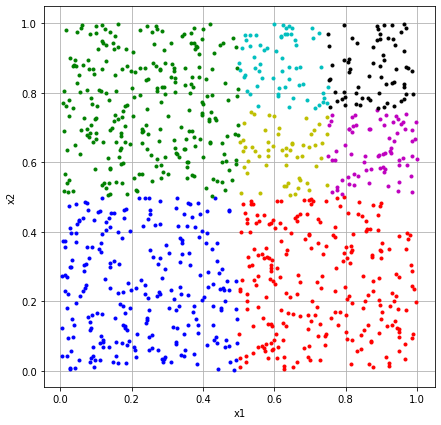

In [10]:
plt.figure(figsize=(7, 7))
plt.plot(x[z == 1], y[z == 1], 'b.')
plt.plot(x[z == 2], y[z == 2], 'r.')
plt.plot(x[z == 3], y[z == 3], 'g.')
plt.plot(x[z == 4], y[z == 4], 'y.')
plt.plot(x[z == 5], y[z == 5], 'c.')
plt.plot(x[z == 6], y[z == 6], 'm.')
plt.plot(x[z == 7], y[z == 7], 'k.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [11]:
type(ww)

numpy.ndarray

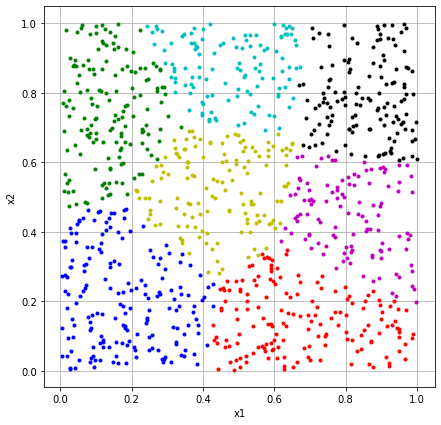

In [12]:
plt.figure(figsize=(7, 7))
plt.plot(x[ww == 1], y[ww == 1], 'b.')
plt.plot(x[ww == 2], y[ww == 2], 'r.')
plt.plot(x[ww == 3], y[ww == 3], 'g.')
plt.plot(x[ww == 4], y[ww == 4], 'y.')
plt.plot(x[ww == 5], y[ww == 5], 'c.')
plt.plot(x[ww == 6], y[ww == 6], 'm.')
plt.plot(x[ww == 7], y[ww == 7], 'k.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

초기 센터 값을 문제에서 주어진 Type의 평균지점으로 지정하였기에, 각 type이 차지하고 있던 영역과 비슷하게 K-means 클러스터링 결과가 나옴. 